In [1]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# Seoul_Public_Bycle
* 서울시 공공자전거 대여이력 정보

In [4]:
# 6개 공공자전거 대여이력정보
# encoding 데이터 명세서 확인 / 혹은 두가지기때문에 각자 해보기
df1 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.01.csv', 
                  encoding='cp949', low_memory = False)
df2 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.02.csv', 
                  encoding='cp949', low_memory = False)
df3 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.03.csv', 
                  encoding='cp949', low_memory = False)
df4 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.04.csv', 
                  encoding='cp949', low_memory = False)
df5 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.05.csv', 
                  encoding='cp949', low_memory = False)
df6 = pd.read_csv('./data2/공공자전거 대여이력 정보_2021.06.csv', 
                  encoding='cp949', low_memory = False)

In [7]:
# 데이터 연결
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05
...,...,...,...,...,...,...,...,...,...,...,...
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00


In [11]:
df.shape

(13613873, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

In [15]:
# 불필요 컬럼 제거
# '자전거번호','대여거치대','반납거치대' -->자료형 확인

df.drop(['자전거번호','대여거치대','반납거치대'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [23]:
# 카테고리 형변환 : '대여 대여소번호', '반납대여소번호' --> 자료형 변화
df[['대여 대여소번호','반납대여소번호']] = df[['대여 대여소번호','반납대여소번호']].astype('category')
#df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
#df['반납대여소번호'] = df['반납대여소번호'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [27]:
# '대여일시', '반납일시' date time으로 변환
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'], errors = 'coerce')
# errors 오류 : {'무시', '상승', '강제'}, 기본 '상승'
# 'raise' 인 경우 잘못된 구문 분석은 예외를 발생시킵니다.
# 'coerce' 이면 잘못된 구문 분석이 NaT로 설정됩니다.
# 'ignore' 이면 잘못된 구문 분석이 입력을 반환합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
dtypes: category(2), datetime64[ns](2), float64(2), object(2)
memory usage: 779.2+ MB


In [28]:
# 결측치 확인
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        123
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [29]:
# 제거
df.dropna(subset=['반납일시','이용거리'], axis=0, inplace=True)
# df.dropna(inplace=True)
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

## 분석 & 시각화

### 일별 이용현황

In [31]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05


In [33]:
# 대여날짜 컬럼을 추가
df['대여날짜'] = df['대여일시'].dt.date
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


In [38]:
# 대여날짜별 대여 건수 : 집계 (그룹분석)
# pivot_tabel, groupby

df_count = df.groupby('대여날짜')['대여일시'].count().to_frame()
df_count

,대여일시
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


In [41]:
df_count.columns=['대여건수']
df_count.head()

,대여건수
대여날짜,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819


<Axes: xlabel='대여날짜'>

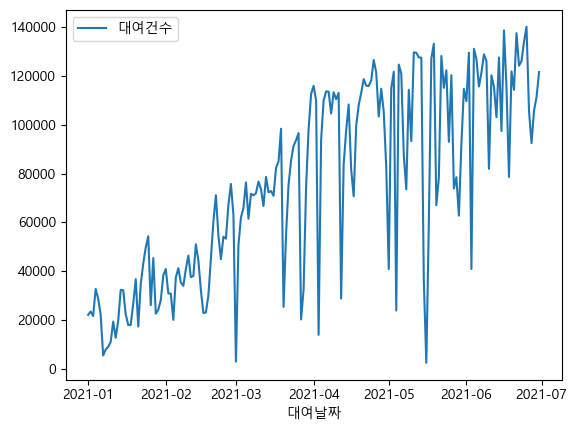

In [43]:
df_count.plot()

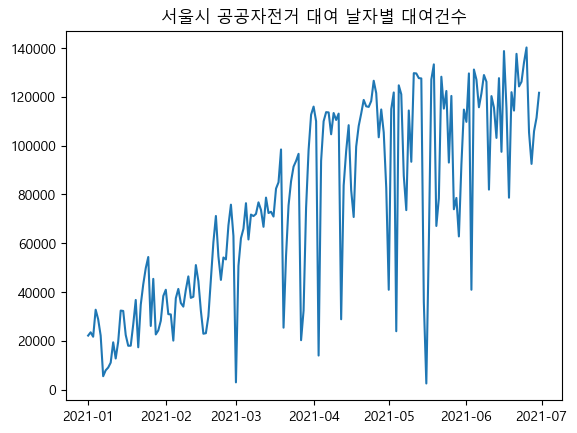

In [46]:
plt.plot(df_count.index, df_count.values)
plt.title('서울시 공공자전거 대여 날짜별 대여건수')
plt.show()

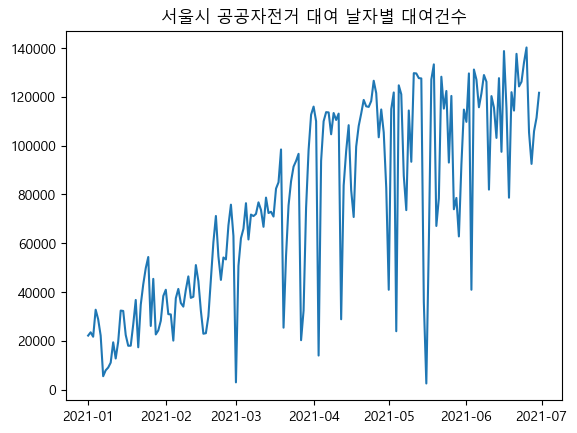

In [47]:
plt.plot(df_count)
plt.title('서울시 공공자전거 대여 날짜별 대여건수')
plt.show()

In [68]:
# 대여 날짜별 이용시간 groupby 사용 
df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()
df_time.head()

,이용시간
대여날짜,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0


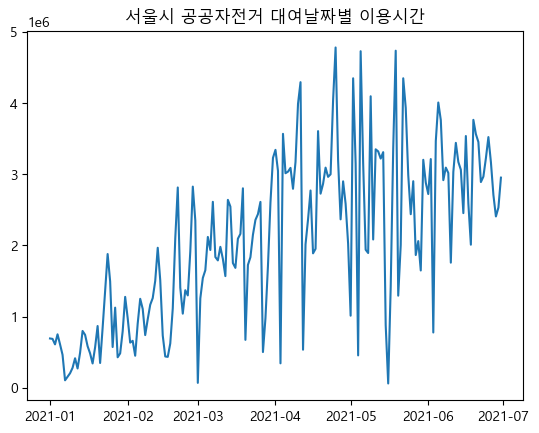

In [75]:
# df_sum.plot()
# plt.plot(df_sum)
plt.plot(df_time.index, df_time['이용시간'])
plt.title('서울시 공공자전거 대여날짜별 이용시간')
plt.show()

In [71]:
# 대여 날짜별 이용 거리
df_distance=df.groupby('대여날짜')['이용거리'].sum().to_frame()
df_distance

,이용거리
대여날짜,
2021-01-01,4.613529e+07
2021-01-02,4.409618e+07
2021-01-03,4.059830e+07
2021-01-04,5.249645e+07
2021-01-05,6.944856e+07
...,...
2021-06-26,3.635015e+08
2021-06-27,3.078146e+08
2021-06-28,2.828124e+08


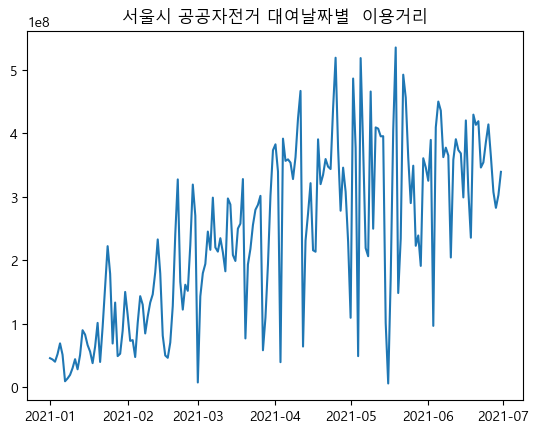

In [74]:
plt.plot(df_distance.index, df_distance['이용거리'])
plt.title('서울시 공공자전거 대여날짜별  이용거리')
plt.show()

In [80]:
# 데이터프레임 합치기
# 이용시간 + 이용거리 + 대여건수
df_date = pd.concat([df_time, df_distance, df_count], axis=1)
df_date

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


### 시간대별 대여/반납현황

In [81]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18


In [87]:
df['대여시간'] = df['대여일시'].dt.hour
df['반납시간'] = df['반납일시'].dt.hour
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613604 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  category      
 2   대여 대여소명   object        
 3   반납일시      datetime64[ns]
 4   반납대여소번호   category      
 5   반납대여소명    object        
 6   이용시간      float64       
 7   이용거리      float64       
 8   대여날짜      object        
 9   대여시간      int64         
 10  반납시간      int64         
dtypes: category(2), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 1.1+ GB


In [96]:
# 시간대별 대여 현황
df_rental = df['대여시간'].value_counts()

In [97]:
# 시간대별 반납 현황
df_return = df['반납시간'].value_counts()

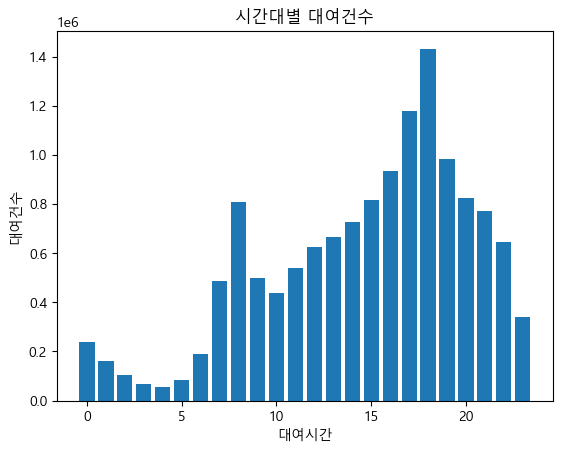

In [98]:
x = df_rental.index
y = df_rental.values
plt.bar(x, y)
plt.title('시간대별 대여건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()

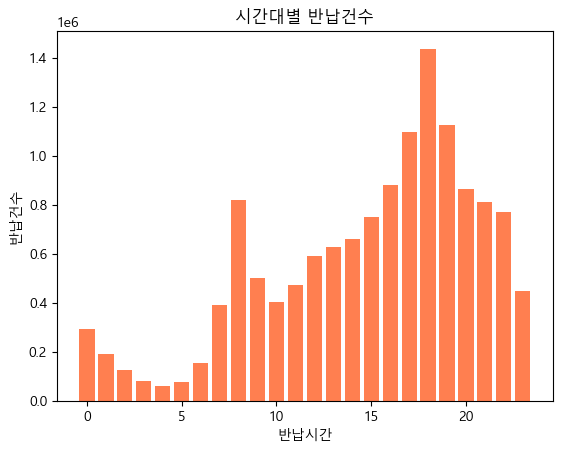

In [100]:
# 반납 시각화
x = df_return.index
y = df_return.values
plt.bar(x, y, color='coral')
plt.title('시간대별 반납건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.show()

In [101]:
# 대여소별 대여/반납현황
df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [102]:
df['반납대여소번호'] # 숫자도 있지만 문자열도 있음

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [104]:
# 대여소 번호의 규칙을 통일하기 위해 0을 제거
# 문자열로 바꾸고
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [105]:
# 왼쪽 0을 제거
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip("0")

In [106]:
# int형으로 변환
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

In [ ]:
# category로 변환
df['반납대여소번호'] = df['반납대여소번호'].astype('category')

### 대여건수가 가장 많은 대여소 top10

In [107]:
df.head()

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18


In [116]:
df_rental1 = df.groupby('대여 대여소명')['대여일시'].count().to_frame()
df_rental1.columns = ['대여건수']
df_rental2 = df_rental1.sort_values(by='대여건수',ascending=False)
df_rental2[:10]

,대여건수
대여 대여소명,
여의나루역 1번출구 앞,68994
뚝섬유원지역 1번출구 앞,68588
마포구민체육센터 앞,43535
봉림교 교통섬,43368
롯데월드타워(잠실역2번출구 쪽),37149
마곡나루역 2번 출구,36988
신대방역 2번 출구,31971
당산육갑문,31527
IFC몰,31443


In [117]:
# 대여건수가 많은 대여소 value_counts())[:10]
df[['대여 대여소번호','대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


In [118]:
# 반납건수가 많은 대여소 value_counts())[:10]
df[['반납대여소번호','반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


### 여의나루역 1번출구앞 대여소 이용현황

In [138]:
df_207 = df[df['대여 대여소번호']==207]
df_207.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68995 entries, 45838 to 3445487
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   대여일시      68995 non-null  datetime64[ns]
 1   대여 대여소번호  68995 non-null  category      
 2   대여 대여소명   68995 non-null  object        
 3   반납일시      68995 non-null  datetime64[ns]
 4   반납대여소번호   68995 non-null  int32         
 5   반납대여소명    68995 non-null  object        
 6   이용시간      68995 non-null  float64       
 7   이용거리      68995 non-null  float64       
 8   대여날짜      68995 non-null  object        
 9   대여시간      68995 non-null  int64         
 10  반납시간      68995 non-null  int64         
dtypes: category(1), datetime64[ns](2), float64(2), int32(1), int64(2), object(3)
memory usage: 5.7+ MB


In [139]:
# 빌린곳에서 반납한 자전거의 이용거리
# df[조건].groupby('대여날짜')['이용시간'].sum().to_frame()
# 조건 = (df['대여 대여소번호']==207) & (df['반납대여소번호']==207)

df_exam = df[(df['대여 대여소번호']==207) & (df['반납대여소번호']==207)].groupby('대여날짜')['이용시간'].sum().to_frame()
df_exam

,이용시간
대여날짜,
2021-01-01,2856.0
2021-01-02,1922.0
2021-01-03,974.0
2021-01-04,817.0
2021-01-05,184.0
...,...
2021-06-26,10188.0
2021-06-27,7631.0
2021-06-28,2377.0


In [140]:
# 여의나루 1번출구앞에서 빌려서 제일 많이 반납한 장소
df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


In [141]:
# 요일별 대여현황
# strftime() 함수
# https://www.ibm.com/docs/ko/i/7.3?topic=functions-strftime-convert-datetime-string
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')
df_207.head()

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_7316\2201040377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri


In [127]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

In [130]:
# df_207 기본통계 이용시간 (평균, 최대, 최소값)
# 전체데이터의 평균

df_207['이용시간'].mean()

50.28551344300312

In [131]:
df_207['이용시간'].min()

1.0

In [132]:
df_207['이용시간'].max()

1268.0

In [135]:
df['이용시간'].mean()
# 여의나루에서 빌린 사람들의 이용시간이 전체 평균의 2배정도 더 이용한 것으로 나타남

27.27823322905529